In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [53]:
pd.set_option('display.max_rows', 500)

Extract

In [54]:
area_raw_df = pd.read_csv('./DATA/FAOSTAT_area.csv')
price_raw_df = pd.read_csv('./DATA/FAOSTAT_prices_apple.csv')
yield_raw_df = pd.read_csv('./DATA/FAOSTAT_yield_per_area.csv') #yield per area
total_yield_raw_df = pd.read_csv('./DATA/FAOSTAT_yield_total.csv')
price_raw_df.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1993,1993,7021,Annual value,USD,461.0,NaN,Official data
1,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1995,1995,7021,Annual value,USD,323.6,NaN,Official data
2,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1996,1996,7021,Annual value,USD,325.4,NaN,Official data
3,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1997,1997,7021,Annual value,USD,253.1,NaN,Official data
4,PP,Producer Prices,3,Albania,5532,Producer Price (USD/tonne),515,Apples,1998,1998,7021,Annual value,USD,248.9,NaN,Official data


Transform

In [55]:
area_df = area_raw_df[['Area', 'Year', 'Value']] #(2704, 3)
area_df.columns = area_df.columns.str.replace('Area', 'Country')
area_df.columns = area_df.columns.str.replace('Value', 'Area_ha') #Total area under the crop in the country

price_df = price_raw_df[['Area', 'Year', 'Value']] #(1883, 3)
price_df.columns = price_df.columns.str.replace('Value', 'Price_USD_tonne') #Producer price USD/tonne
price_df.columns = price_df.columns.str.replace('Area', 'Country')
area_df.shape

yield_df = yield_raw_df[['Area', 'Year', 'Value']] #(2679, 3)
yield_df.columns = yield_df.columns.str.replace('Value', 'Yield_hg_ha') #Yield per area hg/ha
yield_df.columns = yield_df.columns.str.replace('Area', 'Country')

total_yield_df = total_yield_raw_df[['Area', 'Year', 'Value']] #(2733, 3)
total_yield_df.columns = total_yield_df.columns.str.replace('Value', 'TotalYield_tonnes') #Total annual yield in tonnes
total_yield_df.columns = total_yield_df.columns.str.replace('Area', 'Country')
total_yield_df.shape

(2733, 3)

Data warehousing

In [37]:
df = area_df.merge(price_df, on=['Country','Year'], how='left')
df = df.merge(yield_df, on=['Country','Year'], how='left')
df = df.merge(total_yield_df, on=['Country','Year'], how='left')
df.head()

,Country,Year,Area_ha,Price_USD_tonne,Yield_hg_ha,TotalYield_tonnes
0,Afghanistan,1991,2346.0,NaN,74625.0,17507.0
1,Afghanistan,1992,2308.0,NaN,74523.0,17200.0
2,Afghanistan,1993,2300.0,NaN,73913.0,17000.0
3,Afghanistan,1994,2350.0,NaN,74468.0,17500.0
4,Afghanistan,1995,2631.0,NaN,74759.0,19669.0


In [60]:
years = df.groupby(by="Year")
df_2001 = df.loc[df["Year"] == 2002]
print(df_2001)
#df_2001

Empty DataFrame
Columns: [Country, Year, Area_ha, Price_USD_tonne, Yield_hg_ha, TotalYield_tonnes]
Index: []


In [38]:
rows_with_missing_values = df.Price_USD_tonne.isnull()
print(rows_with_missing_values.iloc[0:200])

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31     False
32      True
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58      True
59      True
60      True
61      True
62     False
63      True
64      True
65      True
66      True
67      True
68      True
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [39]:
df.to_csv('workingdata.csv', index = False)

Check if there are NaN vals in the columns and drop for the primer analysis 

In [40]:
#dropping Nanrow values for countries where no price was provided
df.dropna(subset = ['Price_USD_tonne'], inplace=True)
#check = df['TotalYield_tonnes'].isnull().values.any()
print(df)

       Country  Year  Area_ha  Price_USD_tonne  Yield_hg_ha  TotalYield_tonnes
31     Albania  1993   2076.0            461.0      48170.0            10000.0
33     Albania  1995   2140.0            323.6      46729.0            10000.0
34     Albania  1996   2100.0            325.4      47619.0            10000.0
35     Albania  1997   2242.0            253.1      50401.0            11300.0
36     Albania  1998   2300.0            248.9      50000.0            11500.0
...        ...   ...      ...              ...          ...                ...
2671     Yemen  2017   2179.0           2052.2      78068.0            17011.0
2672     Yemen  2018   2148.0           1991.4      77775.0            16706.0
2699  Zimbabwe  2015    744.0           1897.0      89516.0             6660.0
2700  Zimbabwe  2016    735.0           1789.0      89116.0             6550.0
2701  Zimbabwe  2017    734.0           1865.0      88747.0             6514.0

[1854 rows x 6 columns]


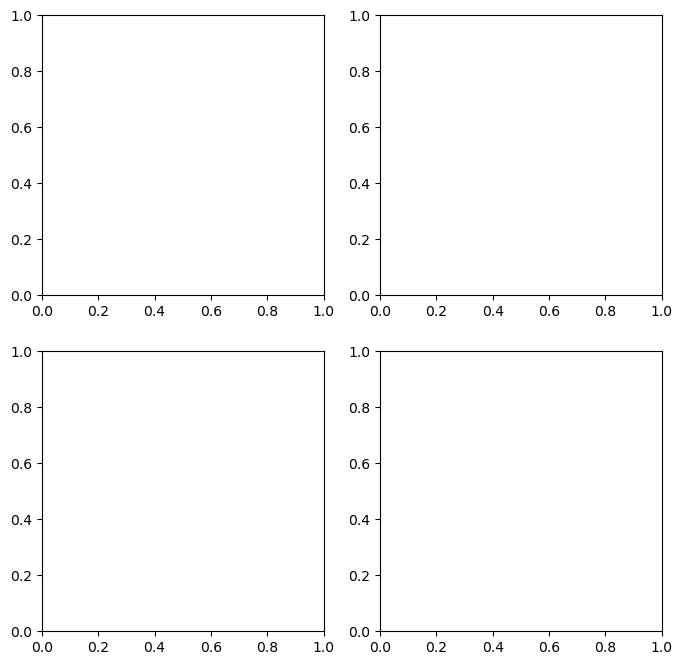

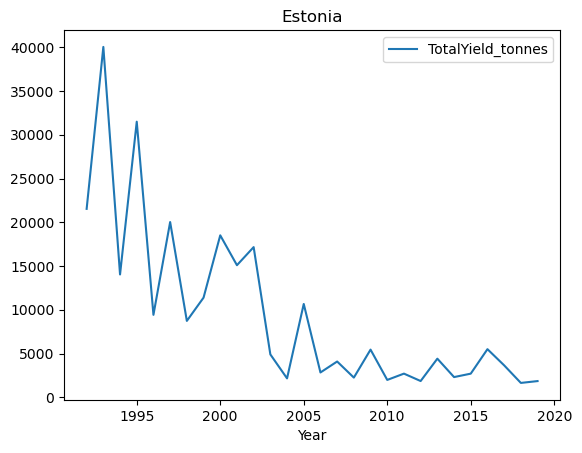

In [41]:
df_Estonia = df.loc[(df['Country'] == "Estonia") & (df['Year'] != 0)]
df_Estonia.plot(x='Year', y='TotalYield_tonnes', kind='line', title = 'Estonia')   #Example visualized for Estonia
plt.show()

In [42]:
#Sorting the data by country per total yield to identify potential grouping producers categories.
df.sort_values(by = 'TotalYield_tonnes', ascending=False, inplace = True)

# separate the data by years 
years = df.Year.unique()
years = sorted(years)
years_df = {}

for year in years:
    df_name = 'df_' + str(year)
    years_df[df_name] = df.loc[df['Year'] == year]
    years_df[df_name].sort_values(by=['TotalYield_tonnes'], ascending=False, inplace = True)
    
print(years_df.keys())

dict_keys(['df_1991', 'df_1992', 'df_1993', 'df_1994', 'df_1995', 'df_1996', 'df_1997', 'df_1998', 'df_1999', 'df_2000', 'df_2001', 'df_2002', 'df_2003', 'df_2004', 'df_2005', 'df_2006', 'df_2007', 'df_2008', 'df_2009', 'df_2010', 'df_2011', 'df_2012', 'df_2013', 'df_2014', 'df_2015', 'df_2016', 'df_2017', 'df_2018', 'df_2019'])


/Users/kath/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [43]:
lengths = []
price_lengths = []

for key in years_df.keys():
    length = len(years_df[key])
    lengths.append([key, length])
    
for key in years_price_df.keys():
    length = len(years_price_df[key])
    price_lengths.append([key, length])
    
lengths = pd.DataFrame(lengths, columns = ['year', 'number_of_countries'])
price_lengths = pd.DataFrame(price_lengths, columns = ['year', 'countries_submitted_price'])
lengths = lengths.merge(price_lengths, on='year')
lengths.year = lengths.year.str.extract('(\d+)')
lengths.year=pd.to_numeric(lengths.year)
print(lengths)

Empty DataFrame
Columns: [year, number_of_countries, countries_submitted_price]
Index: []


In [44]:
#check how much data is available 

x = np.arange(len(lengths))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

#ax.bar(lengths.year, lengths.number_of_countries)
ax.title("Countries Submitted Sata by Years")
ax.set_ylabel('Submitions')
plt.xticks(ticks = lengths.year, rotation=45)
plt.show()

NameError: name 'men_means' is not defined

In [45]:
by_parts = {}

for key, df in years_df.items():
    print(df.describe())
    df

         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    35.0  3.500000e+01        35.000000      35.000000       3.500000e+01
mean   1991.0  1.312495e+05       625.222857  151472.914286       8.530375e+05
std       0.0  3.848242e+05       517.799738   84070.227351       1.235847e+06
min    1991.0  3.000000e+01        11.300000   27328.000000       4.400000e+02
25%    1991.0  1.012750e+04       276.000000   98928.000000       1.452850e+05
50%    1991.0  2.476500e+04       492.300000  142378.000000       5.150740e+05
75%    1991.0  5.871250e+04       764.350000  190933.000000       8.199975e+05
max    1991.0  1.663890e+06      2691.000000  367793.000000       4.557334e+06
         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    43.0  4.300000e+01        43.000000      43.000000       4.300000e+01
mean   1992.0  1.311835e+05       491.741860  185063.953488       9.892326e+05
std       0.0  4.050872e+05       397.698798  149551

         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    69.0  6.900000e+01        69.000000      69.000000       6.900000e+01
mean   2004.0  8.857762e+04       520.765217  155376.869565       1.164120e+06
std       0.0  3.172797e+05       405.459373  133054.175692       4.000016e+06
min    2004.0  8.000000e+00        45.100000    2427.000000       3.200000e+01
25%    2004.0  3.595000e+03       286.700000   54545.000000       3.530700e+04
50%    2004.0  1.338100e+04       409.500000  126148.000000       1.500700e+05
75%    2004.0  4.000000e+04       624.500000  185658.000000       6.908860e+05
max    2004.0  1.877321e+06      2420.700000  649443.000000       2.368197e+07
         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    69.0  6.900000e+01        69.000000      69.000000       6.900000e+01
mean   2005.0  8.864955e+04       520.628986  150362.434783       1.163336e+06
std       0.0  3.194819e+05       375.459638  118443

         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    69.0  6.900000e+01        69.000000      69.000000       6.900000e+01
mean   2017.0  8.113461e+04       742.556522  166453.318841       1.666065e+06
std       0.0  3.268708e+05       512.476331  119972.379796       6.966591e+06
min    2017.0  6.000000e+00       187.600000   14465.000000       2.100000e+01
25%    2017.0  2.522000e+03       422.500000   78068.000000       2.213000e+04
50%    2017.0  1.061700e+04       541.100000  143258.000000       1.497870e+05
75%    2017.0  3.593700e+04       959.900000  212589.000000       5.353000e+05
max    2017.0  1.947146e+06      2242.200000  545560.000000       4.139145e+07
         Year       Area_ha  Price_USD_tonne    Yield_hg_ha  TotalYield_tonnes
count    66.0  6.600000e+01        66.000000      66.000000       6.600000e+01
mean   2018.0  8.445902e+04       753.221212  205675.272727       1.743057e+06
std       0.0  3.322068e+05       533.199047  150458

In [46]:
#devide df by parts for better ploting preformance
by_parts = {}

for key, df in years_df.items():
    df_number_of_parts = math.ceil(len(df) / 20)
    j = 0
    i = 20
    arr = []
    
    for parts in range(df_number_of_parts):
        df_part = df.iloc[j:i]
        arr.append(df_part)
        j += 20
        i += 20
        
    by_parts[key] = arr

print(by_parts['df_1991'][1])
        #plt.bar(df_part["Country"], df_part["TotalYield_tonnes"])

                               Country  Year  Area_ha  Price_USD_tonne  \
1826                          Pakistan  1991  27865.0            994.7   
144                          Australia  1991  20400.0            492.3   
1971                          Portugal  1991  24765.0            639.1   
1711                       Netherlands  1991  16800.0            780.9   
952                             Greece  1991  17070.0            678.8   
2329                       Switzerland  1991   4943.0            684.8   
1913                              Peru  1991  10055.0            336.6   
693                            Denmark  1991   3367.0            831.7   
2415                           Tunisia  1991  10200.0            648.9   
2587                           Uruguay  1991   1894.0            486.4   
722                            Ecuador  1991   3480.0             11.3   
289   Bolivia (Plurinational State of)  1991   1330.0            232.9   
606                             Cyprus

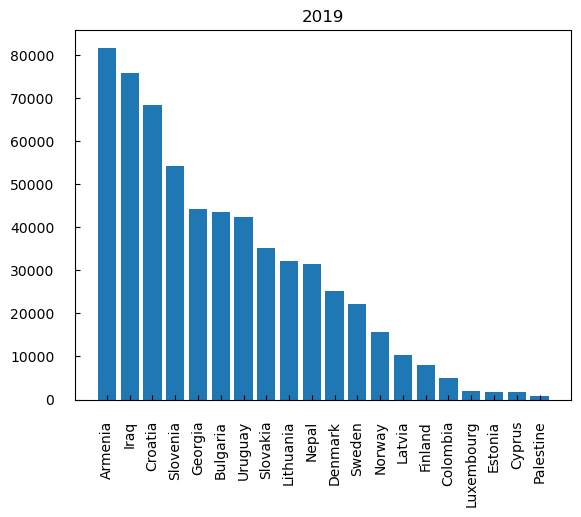

In [47]:
plt.bar(by_parts['df_2019'][2]['Country'], by_parts['df_2019'][2]["TotalYield_tonnes"])
plt.tick_params(axis="both", direction="in", pad=15)
plt.title("2019")
plt.xticks(rotation='vertical')

plt.show()

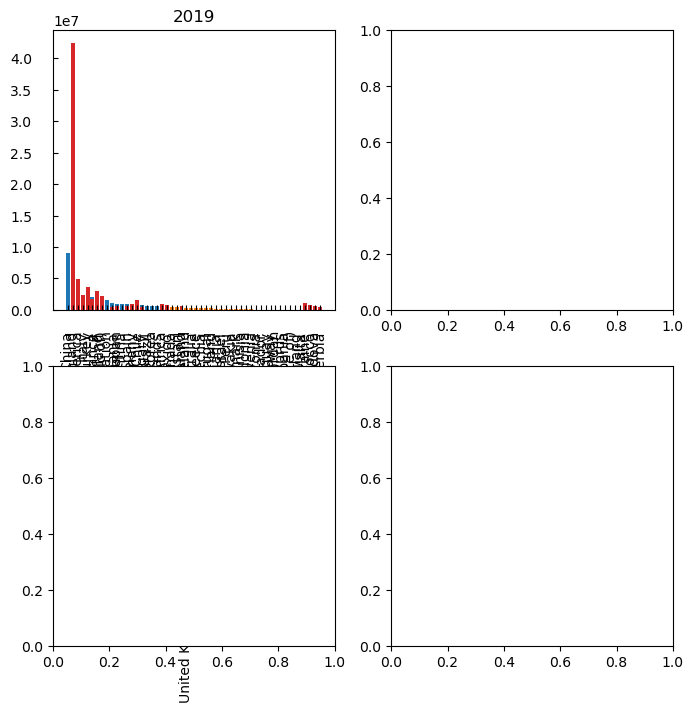

In [51]:
plt.bar(by_parts['df_2019'][0]['Country'], by_parts['df_2019'][0]["TotalYield_tonnes"])
plt.title("2019")
plt.xticks(rotation='vertical')

plt.show()

In [49]:
fig, axes = plt.subplots(figsize=(8,8),nrows=2, ncols=2)
ax1=plt.subplot(2,2,1)

plt.bar(by_parts['df_1993'][0]['Country'], by_parts['df_1993'][0]["TotalYield_tonnes"])
plt.xticks(rotation='vertical')

plt.bar(by_parts['df_1993'][1]['Country'], by_parts['df_1993'][1]["TotalYield_tonnes"])
plt.tick_params(axis="both", direction="in", pad=15)
plt.xticks(rotation='vertical')

plt.bar(by_parts['df_1993'][2]['Country'], by_parts['df_1993'][2]["TotalYield_tonnes"])
plt.tick_params(axis="both", direction="in", pad=15)
plt.xticks(rotation='vertical')

plt.title("1993")
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

In [50]:
df_diff = df.copy()
df_diff = df_diff[df_diff.Yield_hg_ha.isna().any()]
print(df_diff)

KeyError: False